# 统计基础

In [6]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import rc
ChinaFonts = {"黑体": "simhei", "宋体": "simsun",
              "华文彩云": "STCAIYUN", "华文琥珀": "STHUPO",
              "华文楷体": "STKAITI", "华文隶书": "STLITI",
              "华文宋体": "STSONG", "华文细黑": "STXIHEI",
              "华文新魏": "STXINWEI"}
# plt.rc('font', family=ChinaFonts["华文宋体"])
plt.rc('font', family='SimHei', size=13)
plt.rc('axes', unicode_minus=False)  # 解决负号无法正常显示的问题(明显偏大)
path0 = "/home/carton/workspace/python/Multivariate-statistical-analysis/database"  # 设置 数据路径

path1 = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database"  # 设置 图像保存路径

## 常见概率分布
1. 二项分布 𝑿 ∼ 𝑩 𝒏, 𝒑 ：B_Dist = stats.binom(n,p)
2. 泊松分布 𝑿~𝑷(𝝀)： P_Dist=stats.poisson(𝜆)
3. 均匀分布 𝑿~𝑼(𝒂, 𝒃)：U_Dist = stats.uniform(loc,scale) // loc = a, scale = b-a
4. 指数分布 𝑿 ∼ 𝑬(𝝀)：E_Dist = stats.expon(loc,scale) // loc = , scale = 1.0/lambda, 默认值：loc = 0, scale = 1
5. 正态分布 𝑿 ∼ 𝑵 (u, $\sigma ^ 2$) Dist = stats.norm(mu,sigma) // loc = mu, scale = sigma

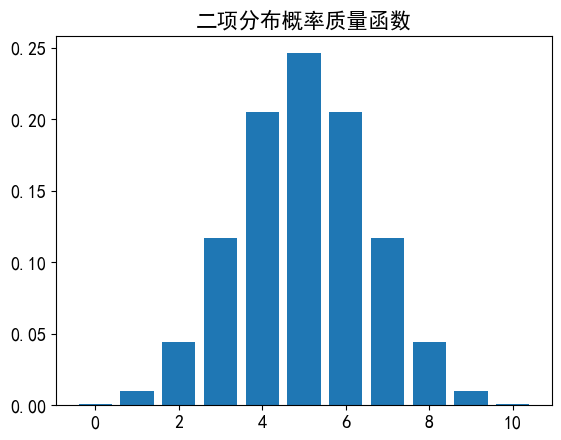

In [7]:
B_Dist = stats.binom(10,0.5) # 定义分布
x = range(11) # 取值范围，从0到10
plt.bar(x, B_Dist.pmf(x)) # 绘图，B_Dist.pmf(x) 生成x在该分布下对应的值
plt.title('二项分布概率质量函数')
plt.show()

### 生成 n 个随机数 设分布已定义为Dist
r = Dist.rvs(size = n)
r = Dist.rvs(n)
### 计算概率密度函数、分布函数、分位数 设分布已定义为Dist
- 概率质量函数，即分布律 (离散型)：Dist.pmf(x)
- 概率密度函数(连续型)：Dist.pdf(x) 也可直接包含参数，如： stats.norm.pdf(x,loc=mu,scale=sigma)
- 分布函数：Dist.cdf(x)
- 分位数，百分比点函数，cdf的反函数： Dist.ppf(p)

## 泊松分布

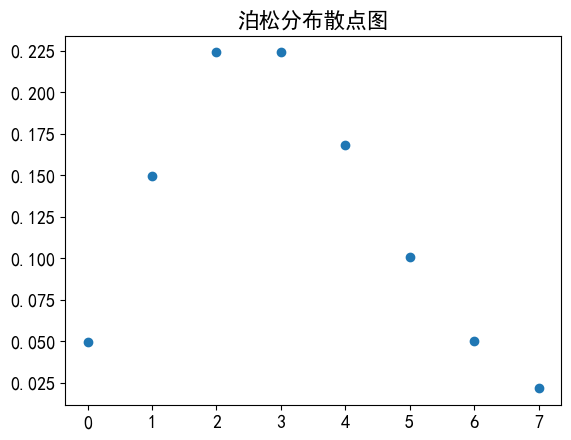

In [8]:
lamb = 3
x = np.arange(stats.poisson.ppf(0.01, lamb),\
stats.poisson.ppf(0.99, lamb))
plt.plot(x, stats.poisson.pmf(x, lamb),'o')
plt.title('泊松分布散点图')
plt.show()

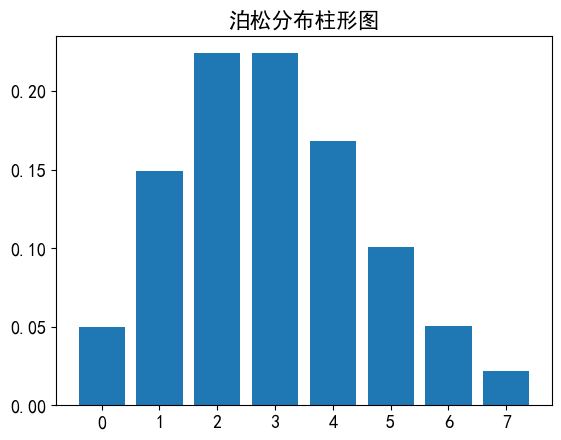

In [9]:
lamb = 3; P_Dist = stats.poisson(3)
x = np.arange(P_Dist.ppf(0.01),P_Dist.ppf(0.99))
plt.bar(x, P_Dist.pmf(x))
plt.title('泊松分布柱形图')
plt.show()

## 均匀分布

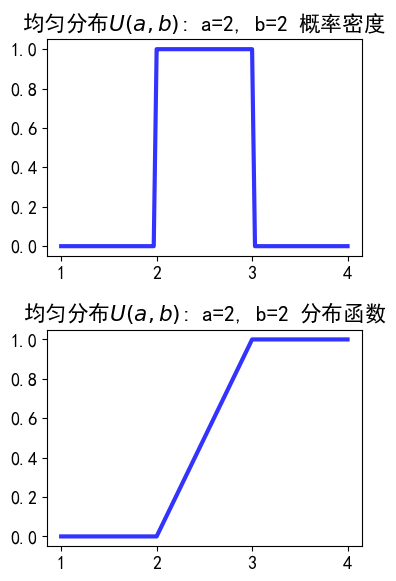

In [10]:
a = 2; b = 3; U_Dist = stats.uniform(a,b-a)
# 采用指定参数 uniform(loc=a, scale=b-a)生成指均匀布
x = np.linspace(a-1,b+1,100)
fig, ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(x, U_Dist.pdf(x), 'b-', lw=3, alpha=0.8)
ax[0].set_title('均匀分布$U(a,b)$: a={0}, b={0} 概率密度'.format(a,b))
ax[1].plot(x, U_Dist.cdf(x), 'b-', lw=3, alpha=0.8)
ax[1].set_title('均匀分布$U(a,b)$: a={0}, b={0} 分布函数'.format(a,b))
plt.tight_layout() # 避免标题与子图重叠
plt.show()

## 韦伯分布

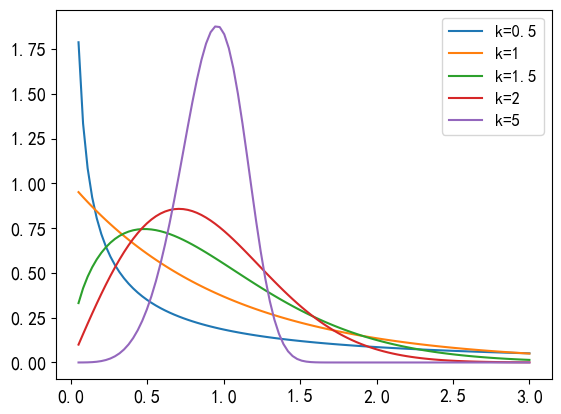

In [11]:
k_list = [0.5, 1, 1.5, 2, 5]
for k in k_list:
    W_Dist = stats.weibull_min(k)
    x = np.linspace(0.05,3,100)
    plt.plot(x, W_Dist.pdf(x), label='k={}'.format(k))
plt.legend(loc='best', fontsize=12, frameon=True) 
plt.show()

## 指数分布

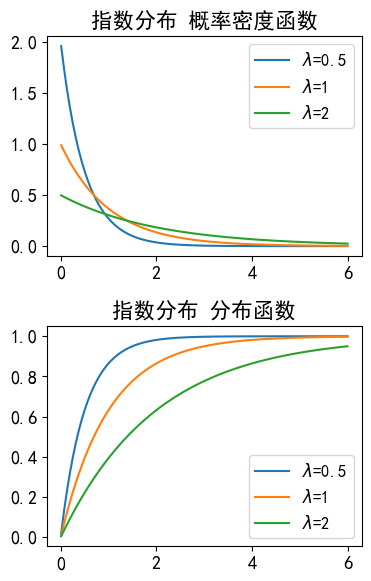

In [12]:
lam_list = [0.5, 1, 2]
fig, ax = plt.subplots(2,1,figsize=(4,6))
for lamb in lam_list:
    E_Dist = stats.expon(0, lamb)
    x = np.linspace(0.01,6,100)
    ax[0].plot(x, E_Dist.pdf(x), label='$\lambda$={}'.format(lamb))
    ax[1].plot(x, E_Dist.cdf(x), label='$\lambda$={}'.format(lamb))
ax[0].legend(loc='best', fontsize=12, frameon=True) 
ax[1].legend(loc='best', fontsize=12, frameon=True)
ax[0].set_title('指数分布 概率密度函数')
ax[1].set_title('指数分布 分布函数')
plt.tight_layout() # 避免标题与子图重叠
plt.show()

## 正态分布

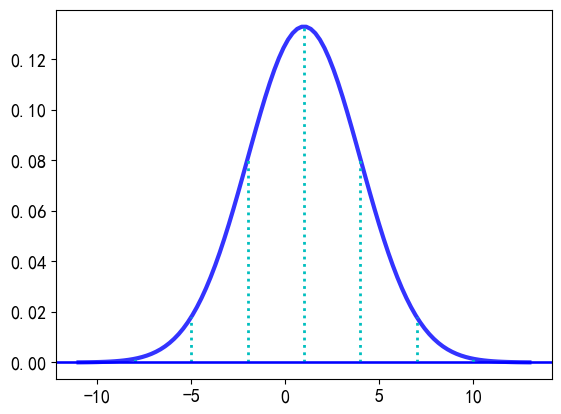

In [13]:
mu = 1; sigma = 3
N_Dist = stats.norm(mu, sigma)
x = np.linspace(mu - 4*sigma, mu + 4*sigma,100)
plt.plot(x, N_Dist.pdf(x), 'b-', lw=3, alpha=0.8) # 密度图
x_list = mu + np.arange(-3,4) * sigma # 3sigma原理图
for x_value in x_list:
    plt.vlines(x_value, 0, N_Dist.pdf(x_value), \
        color="c", lw=2, linestyle=':')
    plt.axhline(y=0, color='b', linestyle='-', lw=1)
plt.show()

## t分布

## 多变量统计指标
* ### 协方差
    * 两个随机变量𝑿, 𝒀的协方差定义为
𝒄𝒐𝒗 𝑿, 𝒀 = 𝑬 𝑿 − 𝑬 𝑿 𝒀 − 𝑬 𝒀
    * 多维随机变量 𝑿𝟏,𝑿𝟐, ⋯ ,𝑿𝒏 的协方差矩阵定义为$C=c_ij$𝑪 = 𝒄𝒊𝒋 𝒏×𝒏
其中，𝒄𝒊𝒋 = 𝒄𝒐𝒗 𝑿𝒊
,𝑿𝒋
, 𝒊,𝒋 = 𝟏, 𝟐, ⋯ , 𝒏
    * 用协方差来衡量变量间关系存在的缺点：
受量纲影响很大
随机变量经过标准化后可以消除量纲的影响
* ### 相关系数
    * 经过标准化处理的协方差，就是相关系数
    * 多维随机变量 𝑿𝟏,𝑿𝟐, ⋯ ,𝑿𝒏 的相关系数矩阵定义为𝑹 = 𝝆𝒊𝒋 𝒏×𝒏
其中，𝝆𝒊𝒋 = 𝝆𝑿𝒊𝑿𝒋
, 𝒊,𝒋 = 𝟏, 𝟐, ⋯ , 𝒏

## python统计指标
### Numpy
1. 极差 ptp(a[, axis])
2. q百分位数 percentile(a, q[, axis])
3. q分位数 quantile(a, q[, axis])
4. median(a[,axis]) 中位数 
5. mean(a[, axis]) 平均值 
6. average(a[, axis, weights]) 加权平均, weights为权重向量
7. std(a[, axis, ddof]) 标准差
8. var(a[, axis, ddof]) 方差 
9. cov(m[, y]) 协方差(矩阵)
10. corrcoef(x[, y]) 相关系数(矩阵)

In [14]:
x = np.array(range(1,10))
print("x={}".format(x))
print("np.ptp(x)={}".format(np.ptp(x)))
print("np.percentile(x,40)={}".format(np.percentile(x,40)))
print("np.quantile(x,0.4)={}".format(np.quantile(x,0.4)))
print("np.quantile(x,0.25)={}".format(np.quantile(x,0.25)))

x=[1 2 3 4 5 6 7 8 9]
np.ptp(x)=8
np.percentile(x,40)=4.2
np.quantile(x,0.4)=4.2
np.quantile(x,0.25)=3.0


In [15]:
x = np.array(range(1,4)); w = x # 权重
print("x={}, w={}".format(x,w))
print(np.median(x)) # 中位数
print(np.mean(x)) # 均值
print(np.average(x,weights=w)) # 加权均值
print(np.var(x)) # 自由度为0 — 二阶中心距
print(np.var(x,ddof=1)) # 自由度为1 — 样本方差

x=[1 2 3], w=[1 2 3]
2.0
2.0
2.3333333333333335
0.6666666666666666
1.0


In [16]:
x = np.array(range(1,10)).reshape(3,-1)
print(x) # 生成数组，再变形为矩阵
print(np.mean(x)) # 基于函数，数组为参数
print(x.mean()) # 基于数组调用函数，效果等价
print(np.mean(x,axis=0)) # 按列统计
print(np.mean(x,axis=1)) # 按行统计

[[1 2 3]
 [4 5 6]
 [7 8 9]]
5.0
5.0
[4. 5. 6.]
[2. 5. 8.]


In [17]:
x = np.array(range(1,4))
print(x)
print(np.var(x,ddof=1)) # 自由度为1 ~ 样本方差
print(np.cov(x)) # 样本协方差

[1 2 3]
1.0
1.0


In [18]:
N_Dist = stats.norm(0, 1) # 指定标准正态分布
np.random.seed(0) # 设定种子，生成相同随机数
x = N_Dist.rvs((3,3)) # 生成矩阵
print(np.round(x,4)) # 四舍五入，以便显示
print(np.round(np.cov(x),4)) # 计算协方差矩阵
print(np.round(np.corrcoef(x),4)) # 相关系数矩阵

[[ 1.7641  0.4002  0.9787]
 [ 2.2409  1.8676 -0.9773]
 [ 0.9501 -0.1514 -0.1032]]
[[0.4686 0.2317 0.3929]
 [0.2317 3.0982 0.6107]
 [0.3929 0.6107 0.3875]]
[[1.     0.1923 0.922 ]
 [0.1923 1.     0.5573]
 [0.922  0.5573 1.    ]]


### Pandas（常用）

1. count([axis]) 频数，按行(列)统计非空样本数目 
2. mode([axis]) 众数
3. sum([axis]) 求和 
4. mean([axis]) 均值
5. cumsum([axis]) 按行(或列) 累计求和 
6. std([axis, ddof]) 标准差
7. min([axis]) 最小值 
8. var([axis, ddof]) 方差
9. max([axis]) 最大值 
10. skew([axis]) 偏度
11. median([axis]) 中位数 
12. kurt([axis]) 峰度，等价函数 kurtosis([axis])
13. quantile([q, axis]) 分位数，参数𝒒 ∈ [𝟎, 𝟏] 
14. cov([ddof]) 剔除缺失值后列变量间的协方差
15. describe() 描述统计，均值、标准差、分位
数等
16. corr([method]) 相关系数，method 可选 {‘pearson’, 
‘kendall’, ‘spearman’} or 自定义函数

In [19]:
x = np.array(range(1,10)).reshape(3,-1)
df1 = pd.DataFrame(data=x, 
columns=["A","B","C"])
df1 # 显示数据集

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [20]:
df1.describe() # 描述统计

,A,B,C
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [21]:
df1.min() # 按列求最小值


A    1
B    2
C    3
dtype: int64

In [22]:
df1.sum(axis=1) # 按行求和


0     6
1    15
2    24
dtype: int64

In [23]:
df1.cumsum(axis=1) # 按行累计求和

,A,B,C
0,1,3,6
1,4,9,15
2,7,15,24


利用apply()函数定制统计，apply(mean,std,max,min)生成统计表格

In [24]:
stat_dic = { "mean": "均值", "std": "标准差", "max": "极大值", "min": "极小值"}
df_res = df1.apply(stat_dic.keys())
df_res = df_res.rename(index=stat_dic) # 采用字典，将统计指标 英文 替换为 中文
df_res.T

,均值,标准差,极大值,极小值
A,4.0,3.0,7.0,1.0
B,5.0,3.0,8.0,2.0
C,6.0,3.0,9.0,3.0


In [25]:
stat_dic1 = { "mean": "均值", "std": "标准差", "skew": "偏度", "kurt": "峰度"}
df_res1 = df1.apply(stat_dic1.keys())
df_res1 = df_res1.rename(index=stat_dic1) # 采用字典，将统计指标 英文 替换为 中文
df_res1.T

,均值,标准差,偏度,峰度
A,4.0,3.0,0.0,NaN
B,5.0,3.0,0.0,NaN
C,6.0,3.0,0.0,NaN


### Scipy.stats
1. gmean(a[, axis, weights]) 几何平均值，可通过 "weights=" 加权
2. hmean(a[, axis, weights]) 调和平均值，可通过 "weights=" 加权
3. mode(a[, axis]) 众数
4. moment(a[, moment, axis]) 中心矩，通过 "moment=n"设定为n阶中心矩
5. kurtosis(a[, axis]) 峰度
6. skew(a[, axis]) 偏度
7. describe(a[, axis, ddof]) 综合描述统计，含样本数、最大最小、均值、
方差、偏度、峰度

In [26]:
x0 = list(range(1,10)) + [2,6,6] 
x = np.array(x0)
print(x)
print("几何平均={}".format(stats.gmean(x)))
print("调和平均={}".format(stats.hmean(x)))
print("众数={}".format(stats.mode(x)))
print("偏度={}".format(stats.kurtosis(x)))
print("峰度={}".format(stats.skew(x)))

[1 2 3 4 5 6 7 8 9 2 6 6]
几何平均=4.150412803110606
调和平均=3.2766280203705715
众数=ModeResult(mode=array([6]), count=array([3]))
偏度=-1.1254416936734422
峰度=-0.04213445147002688


/tmp/ipykernel_8875/702404345.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("众数={}".format(stats.mode(x)))


In [27]:
stats.describe(x)

DescribeResult(nobs=12, minmax=(1, 9), mean=4.916666666666667, variance=6.446969696969696, skewness=-0.04213445147002688, kurtosis=-1.1254416936734422)

In [28]:
np.random.seed(0)
x = np.random.randn(1, 8).reshape(4,-1)
df1 = pd.DataFrame(data = x, columns = ["A", "B"])
df1

,A,B
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357


## 参数的假设检验
1. 定性可视化方法
概率图、PP图、QQ图(常用) —— 比较分位数或关键参数
 - QQ图：Quantile Quantile Plot，分位数图示法(Q-分位数)，
将给定数据集的分位数和参考分布的分位数一起绘制

- 如果两个分布相似，则该Q-Q图**趋近于落在y=x线上**；

- 如果两分布线性相关，则点在Q-Q图上趋近于落在一条直线上，但不
一定在y=x线上.
2. 正态性定量检验
基于与给定分布比较(“最优拟合”)的检验，如K-S检验
基于样本的描述性统计学的检验，如偏度、峰度检验

## 采用Python绘制QQ图，直观理解该图形效果.

In [29]:
np.random.seed(0) # 设定种子，生成相同随机数
d_normal = np.random.normal(6, 2, 1000) # 正态分布 N(6,2^2) 随机数
d_uniform = np.random.uniform(0, 12, 1000) # 均匀分布 U(0,12) 随机数
d_exp = np.random.exponential(1/6, 1000) # 指数分布 E(1/6) 随机数
d_binomial = np.random.binomial(20,6/20, 1000) # 二项分布 B(20,6/20) 随机数
d_t = np.random.standard_t(6,1000) # t 分布 t(6) 随机数
d_chi2 = np.random.chisquare(6,1000) # 卡方分布 chi2(6) 随机数


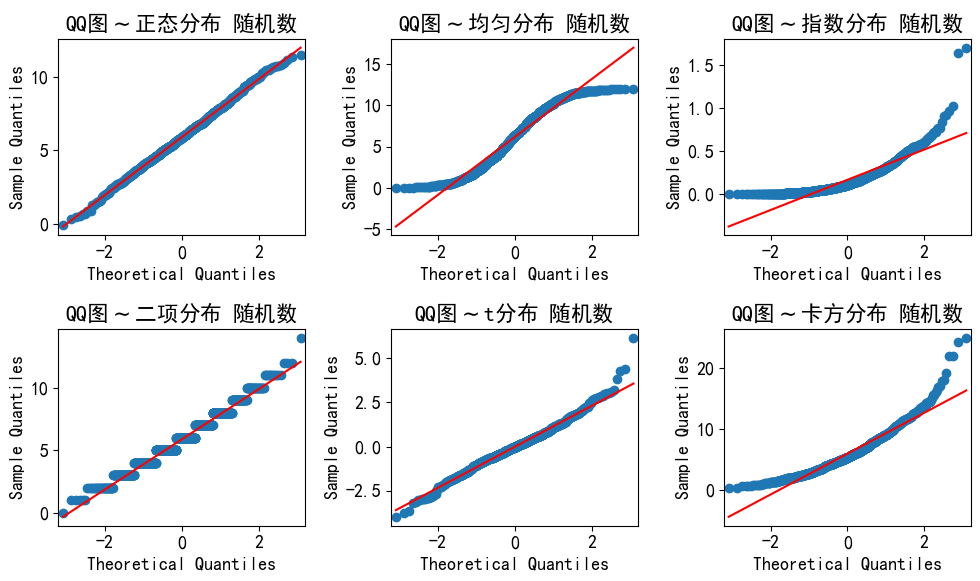

In [30]:
data_name = [d_normal, d_uniform, d_exp, d_binomial, d_t, d_chi2]
dist_name = ["正态", "均匀", "指数", "二项", "t", "卡方"]
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for i in range(6):
    row = i // 3; col = i % 3
    sm.qqplot(data_name[i], line='s', ax=ax[row][col])
    ax[row][col].set_title('QQ图$\sim${}分布 随机数'.format(dist_name[i]))
plt.tight_layout() # 避免标题与子图重叠
plt.show()

### 𝝌𝟐检验
若样本服从某种分布，则样本容量足够大时，将样本分为𝒌组，
统计每一组的频数，观察频数𝒇𝑶𝒊(observed frequency)与期望频数
𝒇𝑬𝒊(expected frequency)的差异不会显著，构造统计量

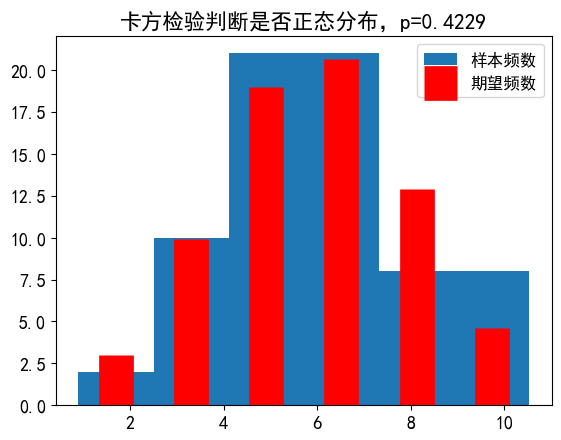

In [31]:
np.random.seed(0) # 设定种子，生成相同随机数
n = 70; bins = 6 # 样本数量 和 分块统计数量
sample = np.random.normal(6, 2, n) # 正态分布 N(6,2^2) 随机数
plt.figure()
H = plt.hist(sample, bins, label="样本频数")
Normal_dist = stats.norm(sample.mean(), sample.std(ddof=1)) # 估计分布参数
O = H[0] # 样本频数
E = np.diff(Normal_dist.cdf(H[1]))*len(sample) # 根据累积分布函数反推期望频数
E = np.sum(O)/np.sum(E)*E
W,p = stats.chisquare(f_obs=O, f_exp=E) # 卡方检验
x = [ (H[1][i] + H[1][i+1])/2 for i in range(len(H[0]))] # 确定区间中点
plt.vlines(x,0,E,color='r',lw=150/bins, label="期望频数")
plt.legend(loc='best', fontsize=12, frameon=True)
plt.title("卡方检验判断是否正态分布，p={:.4f}".format(p))
plt.show()

### K-S检验
全称Kolmogorov-Smirnov检验，是用经验分布函数𝑺 𝒙 和参考分布函
数间的最大垂直距离，作为分布相似性的一种度量的非参数检验.
可用于验证多种分布，但需要样本容量较大<br>
基本格式：scipy.stats.kstest (rvs, cdf, args, alternative ='two-sided')
- rvs：待检验数据；
- cdf：stats中分布的名称，如'norm'，'expon'，'rayleigh'等；
- arg：分布参数，如正态分布用 args=(rvs.mean(), rvs.std(ddof=1))
- alternative：默认双尾检验，可设置'less'或'greater'作单尾检验；
- 返回：W - 统计数；p-value - p值

In [32]:
# 生成随机数
np.random.seed(0) # 设定种子，生成相同随机数
d_normal = np.random.normal(6, 2, 1000) # 正态分布 N(6,2^2)
d_uniform = np.random.uniform(0, 12, 1000) # 均匀分布 U(0,12)
d_exp = np.random.exponential(1/6, 1000) # 指数分布 E(1/6)
d_binomial = np.random.binomial(20,6/20, 1000) # 二项分布 B(20,6/20)
d_t = np.random.standard_t(6,1000) # t 分布 t(6)
d_chi2 = np.random.chisquare(6,1000) # 卡方分布 chi2(6)
# 验证是否正态分布，参数 mu = mean(), sigma = std(ddof=1)
df_test_res = pd.DataFrame(columns=["分布", "W", "p"]) # 用于记录结果
data_name = [d_normal, d_uniform, d_exp, d_binomial, d_t, d_chi2]
dist_name = ["正态", "均匀", "指数", "二项", "t", "卡方"]
# dist_name_en = ["norm", "uniform", "expon", "binom", "t", "chi2"]
for i in range(6):
    w,p = stats.kstest(data_name[i], "norm", args=(data_name[i].mean(),\
        data_name[i].std(ddof=1)))
    df_test_res.loc[i] = [dist_name[i], w, p] # 记录结果
df_test_res

,分布,W,p
0,正态,0.019125,8.508224e-01
1,均匀,0.065612,3.467680e-04
2,指数,0.167122,7.002991e-25
3,二项,0.115138,5.263832e-12
4,t,0.042378,5.352922e-02
5,卡方,0.084552,1.143762e-06


 选择一种分布，生成随机数
采用K-S检验判断是否服从正态分布
可视化展示：随着样本容量的增加，判断正确率如何变化

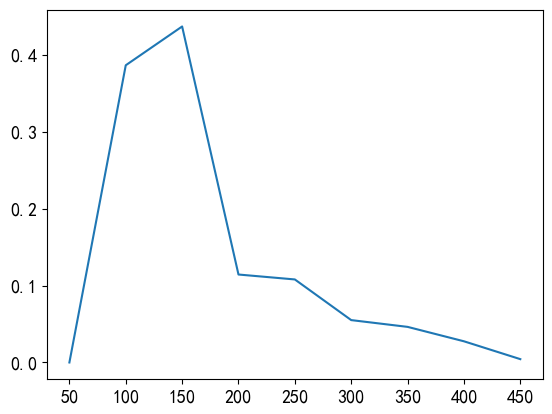

In [33]:
# 定义大小为10的数组
n = np.arange(50, 500, 50)
y = np.zeros(len(n))
# np.random.seed(0)  # 设定种子，生成相同随机数
for i in range(1, len(n)):
    d_uniform = np.random.uniform(0, 12, n[i])  # 均匀分布 U(0,12)
    w, p = stats.kstest(d_uniform, "norm", args=(d_uniform.mean(),
                                                 d_uniform.std(ddof=1)))
    
    y[i] = p
plt.plot(n, y)


In [34]:
# 验证是否正态分布
df_test_res = pd.DataFrame(columns=["分布", "W", "p"])
data_name = [d_normal, d_uniform, d_exp, d_binomial, d_t, d_chi2]
dist_name = ["正态", "均匀", "指数", "二项", "t", "卡方"]
for i in range(6):
    W,p = stats.shapiro(data_name[i])
    df_test_res.loc[i] = [dist_name[i], W, p]
df_test_res

,分布,W,p
0,正态,0.998556,5.916485e-01
1,均匀,0.943547,4.671812e-12
2,指数,0.784597,2.443497e-34
3,二项,0.974848,3.828132e-12
4,t,0.988599,5.159760e-07
5,卡方,0.928221,1.833615e-21


## 数据变换
Box-Muller方法(生成正态分布随机数) ：
- 𝑿 = 𝑹𝐜𝐨𝐬𝜽 = $−𝟐 \sqrt{lnU_1} 𝐜𝐨𝐬(𝟐𝝅)𝑼_𝟐$
- 𝒀 = 𝑹𝐬𝐢𝐧𝜽 = $−𝟐 \sqrt{lnU_1} 𝐬in(𝟐𝝅)𝑼_𝟐$

In [35]:
d_uniform = np.random.uniform(0, 1, 1000) # 均匀分布 U(0,12)
